### Description:
The purpose of this project is to predict whether a new paient will have Parkinon's or not 
based off of the characteristics of their speech.  

### Dataset description from UC Irvine's ML Repo:
[Click here for UCI ML page](https://archive.ics.uci.edu/dataset/174/parkinsons) 

[Click here for dataset source](https://ieeexplore.ieee.org/document/4636708)

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds one of 195 voice recording from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to "status" column which is set to 0 for healthy and 1 for PD. 

In [2]:
# Import UC Irvine ML Repository
from ucimlrepo import fetch_ucirepo

In [3]:
# You'll need to clone my personal PhD Work repository which has my FSOR-l21 feature selection method.
# git clone https://github.com/zach-chairez/PhD-Work.git
# I've added the scripts to my local directory for easy access for this project.

from fsor_l21 import fsor_l21

In [4]:
# Importing visualization packages and Numpy
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Fetch Parkinsons Dataset
data = fetch_ucirepo(id = 174)

# Splitting dataset into features and classes
features = data.data.features
classes = data.data.targets

In [6]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MDVP:Fo       195 non-null    float64
 1   MDVP:Fhi      195 non-null    float64
 2   MDVP:Flo      195 non-null    float64
 3   MDVP:Jitter   195 non-null    float64
 4   MDVP:Jitter   195 non-null    float64
 5   MDVP:RAP      195 non-null    float64
 6   MDVP:PPQ      195 non-null    float64
 7   Jitter:DDP    195 non-null    float64
 8   MDVP:Shimmer  195 non-null    float64
 9   MDVP:Shimmer  195 non-null    float64
 10  Shimmer:APQ3  195 non-null    float64
 11  Shimmer:APQ5  195 non-null    float64
 12  MDVP:APQ      195 non-null    float64
 13  Shimmer:DDA   195 non-null    float64
 14  NHR           195 non-null    float64
 15  HNR           195 non-null    float64
 16  RPDE          195 non-null    float64
 17  DFA           195 non-null    float64
 18  spread1       195 non-null    

In [7]:
features.head(5)

,MDVP:Fo,MDVP:Fhi,MDVP:Flo,MDVP:Jitter,MDVP:Jitter,MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer,...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992,157.302,74.997,0.00784,0.00784,0.00370,0.00554,0.01109,0.04374,0.04374,...,0.02971,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400,148.650,113.819,0.00968,0.00968,0.00465,0.00696,0.01394,0.06134,0.06134,...,0.04368,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,116.682,131.111,111.555,0.01050,0.01050,0.00544,0.00781,0.01633,0.05233,0.05233,...,0.03590,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676,137.871,111.366,0.00997,0.00997,0.00502,0.00698,0.01505,0.05492,0.05492,...,0.03772,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014,141.781,110.655,0.01284,0.01284,0.00655,0.00908,0.01966,0.06425,0.06425,...,0.04465,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


#### Each feature is numerical in nature and there appears to be no missing values or NaN's. 

In [9]:
classes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   status  195 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [10]:
classes.value_counts()

status
1         147
0          48
Name: count, dtype: int64

#### The data is unbalanced as the number of those with Parkinson's is about three times as many as those without it.

#### We will perform two sampling methods:
##### - Keep dataset as it is.
##### - Split the dataset into 48 0's and 48 random 1's.  

In [12]:
# Import packages to manipulate data
import pandas as pd
from sklearn.preprocessing import StandardScaler

# First, we'll standardize our feature dataset
scaler = StandardScaler()
std_features = pd.DataFrame(scaler.fit_transform(features), columns = features.columns)

# Combine classes and features for sampling purposes
full_data = pd.concat([classes,std_features], axis = 1)

# Find the 0's (No Parkinson's) and 1's (Has Parkinson's) in the dataset
no_parkinsons = full_data.index[full_data['status'] == 0].tolist()
has_parkinsons = full_data.index[full_data['status'] == 1].tolist()

# Sepearate the data based on classes.
nopark_data = full_data.loc[no_parkinsons]
park_data = full_data.loc[has_parkinsons]

# Subsample the dataset with Parkinsons to match the number of samples 
# that don't have Parkinsons.
sub_park_data = park_data.sample(n = len(nopark_data), random_state = 2356)

# Combine sampled data into new, smaller dataset
small_data = pd.concat([sub_park_data,nopark_data], axis = 0)

#### We'll train classifiers on the full dataset and sub-sampled dataset. 

In [14]:
# We'll use XGBoost, a regular Decision Tree, Logistic Regression, SVM, and kNN - then compare.
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer

#### We'll begin with the full dataset for training and testing.

In [16]:
# Splitting the data into training and testing (we'll do a 70/30 split at random)
feat_train,feat_test,class_train,class_test = train_test_split(std_features,classes, test_size = 0.3, random_state = 2356, stratify = classes)

In [17]:
# Changing shapes of class_train and class_test to interact with the classifiers
class_train_np = class_train.to_numpy().ravel()
class_test_np = class_test.to_numpy().ravel()

In [18]:
# Logistic Regression
lr_model = LogisticRegression().fit(feat_train,class_train_np)

# Support Vector Machine
svm_model = SVC().fit(feat_train,class_train_np)

# kNN (with k = 3)
knn = KNeighborsClassifier(n_neighbors = 3)
knn_model = knn.fit(feat_train,class_train_np)

# Decision Tree
dt_model = DecisionTreeClassifier().fit(feat_train,class_train_np)

# Using XGBoost
xgb_model = XGBClassifier().fit(feat_train.values,class_train.values)

In [19]:
# Testing all classifiers
lr_pred = lr_model.predict(feat_test)
svm_pred = svm_model.predict(feat_test)
knn_pred = knn_model.predict(feat_test)
dt_pred = dt_model.predict(feat_test)
xgb_pred = xgb_model.predict(feat_test.values)

In [20]:
# Creating a dictionary of results to display as a Pandas DataFrame
classifiers = {
    "3NN": knn_model,
    "Decision Tree": dt_model,
    "Logistic Regression": lr_model,
    "SVM": svm_model,
    "XGBoost": xgb_model,
}

# Itearting over each model to calculate metrics and add them to a list.
results = []
for model_name, model in classifiers.items():
    if  model_name == 'XGBoost':
        model_pred = model.predict(feat_test.values)
    else:
        model_pred = model.predict(feat_test)
    results.append({
    'Model': model_name, 
    'Accuracy':  f"{accuracy_score(model_pred,class_test)*100:.2f}%",
    'Precision':  f"{precision_score(model_pred,class_test)*100:.2f}%",
    'Recall (Sensitivity)':  f"{recall_score(model_pred,class_test)*100:.2f}%",
    'F1 Score':  f"{f1_score(model_pred,class_test)*100:.2f}%"
    })

# Convert to DataFrame
results_df = pd.DataFrame(results)
results_df

,Model,Accuracy,Precision,Recall (Sensitivity),F1 Score
0,3NN,91.53%,93.18%,95.35%,94.25%
1,Decision Tree,77.97%,79.55%,89.74%,84.34%
2,Logistic Regression,84.75%,88.64%,90.70%,89.66%
3,SVM,88.14%,100.00%,86.27%,92.63%
4,XGBoost,88.14%,95.45%,89.36%,92.31%


### Feature Selection and Class Visualization 

In [22]:
# Performing feature selection to determine which features are the most important in predicting Parkinsons/No Parkinsons.
# FSOR-l21 requires that the data matrix is a numpy array and the label vector is a one-hot encoded label matrix.

# X: n x m data matrix as numpy array (n features, m observations)
# Y: k x m data matrixa as numpy array (k classes, m observations)
X = std_features.to_numpy().T
Y = pd.get_dummies(classes.to_numpy().ravel(), dtype = int).T

# Initialization for FSOR-l21
class optimize_options:
    def __init__(self):
        self.tol = 1e-6 # Stopping tolerance
        self.maxit = 1000 # Max number of iterations
        self.init = 0 # No initial guess to the ranks
        self.lambda_param = 0.01 # Regularization hyperparameter

opts = optimize_options()
info = fsor_l21(X,Y,opts)

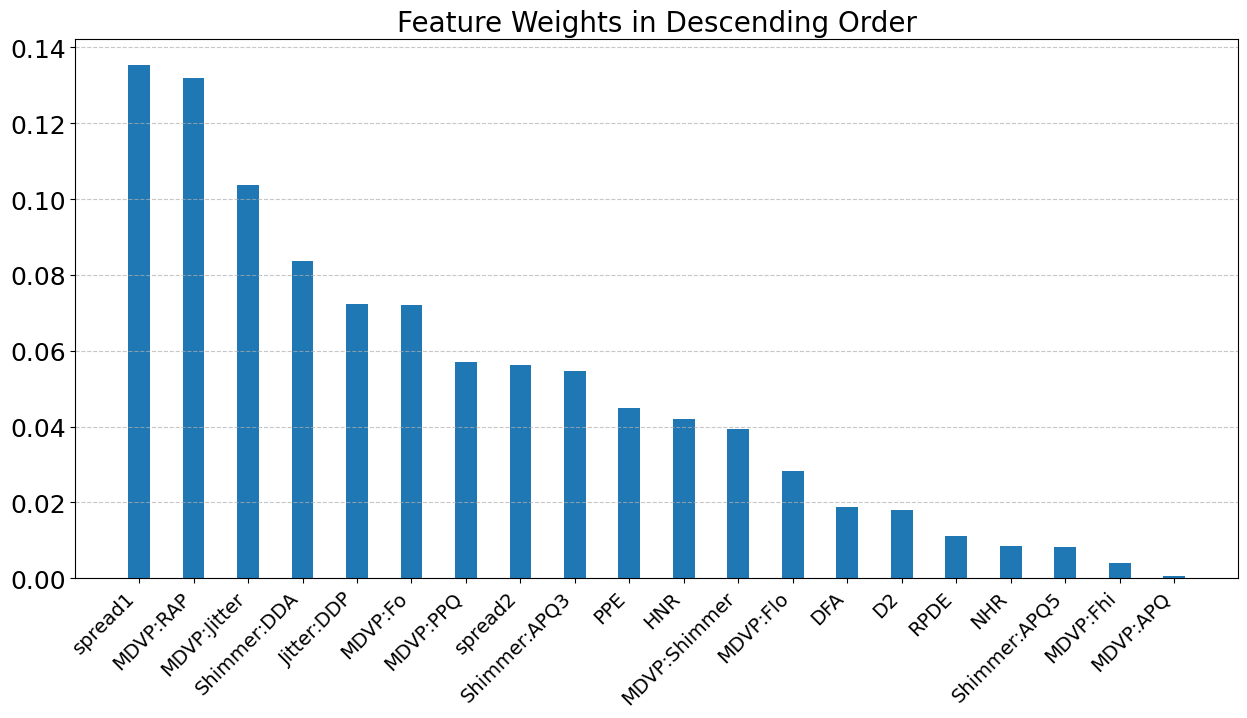

In [23]:
# Sorting the features from most important to least important
sorted_wts = sorted(info.wts.flatten().tolist(), reverse = True)
sorted_wts_indices = np.argsort(info.wts.ravel().T)[::-1]

plt.figure(figsize = (15,7))
plt.bar(features.columns[sorted_wts_indices], sorted_wts, width = 0.4)
plt.xticks(fontsize = 14, rotation = 45, ha = 'right')
plt.yticks(fontsize = 18)
plt.title('Feature Weights in Descending Order', fontsize = 20)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.7)
plt.show()

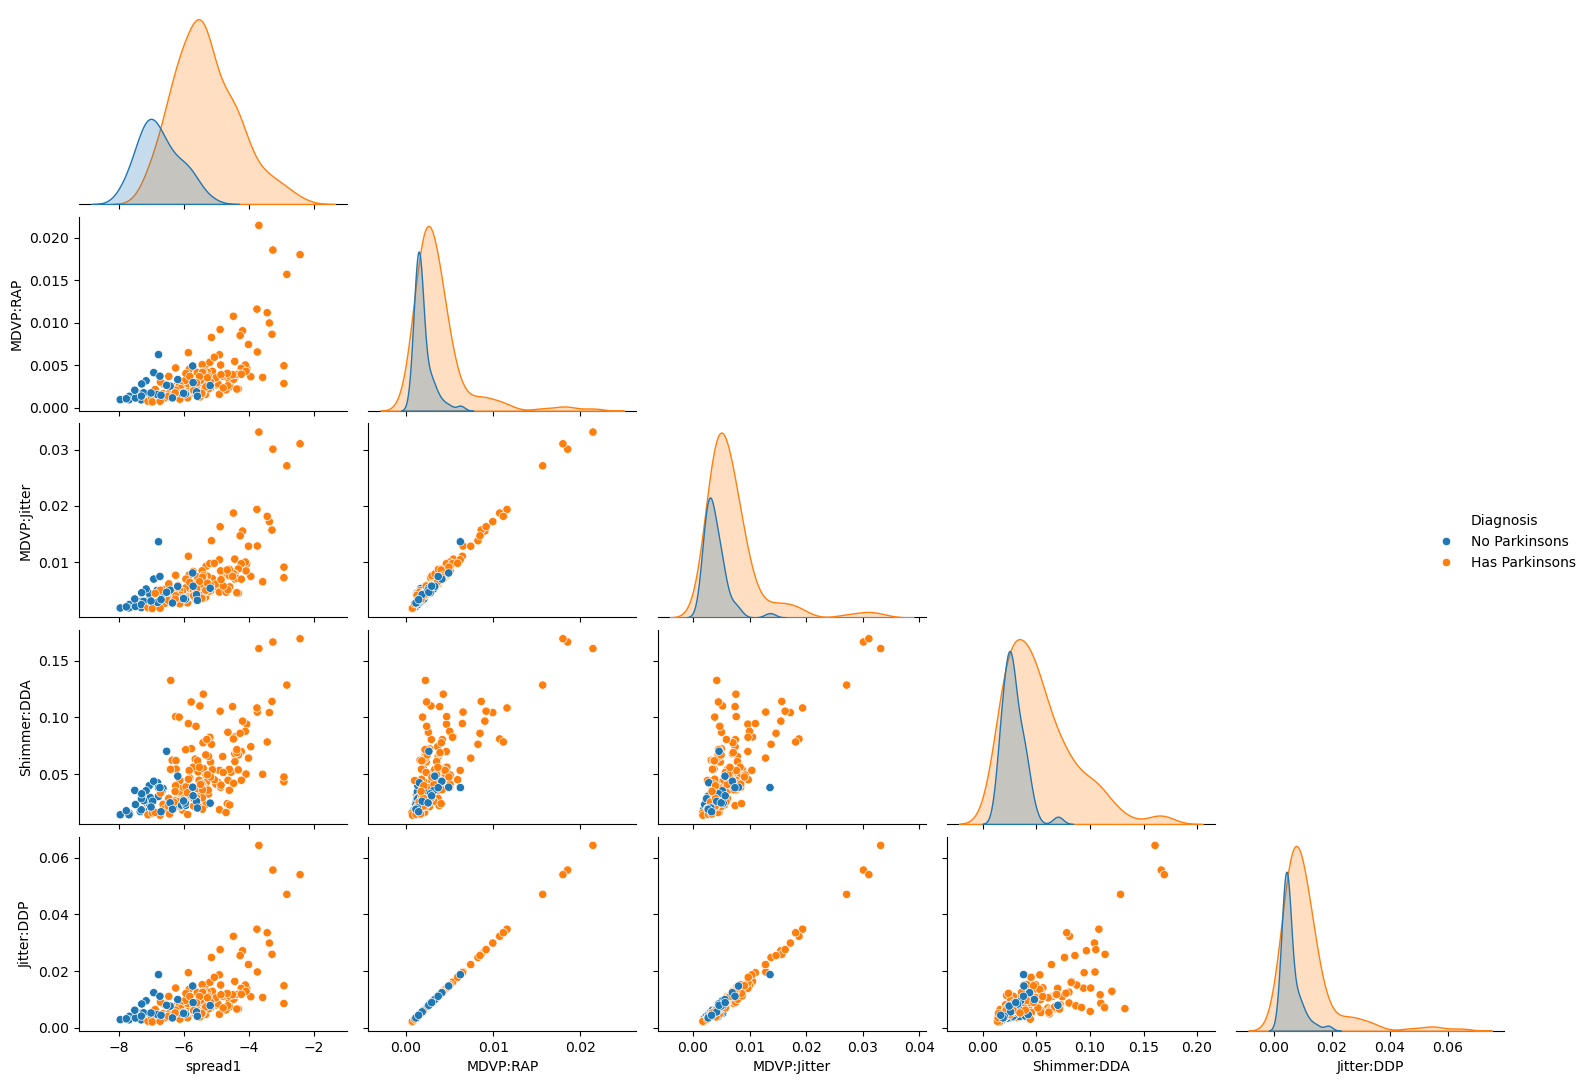

In [24]:
# Determining top k features for visualization
k = 5
top_k_wts = np.argsort(info.wts.ravel().T)[-k:][::-1]
top_k_features = features.iloc[:,top_k_wts]
top_k_data = pd.concat([top_k_features,classes], axis = 1)

# Creating a scatterplot matrix 
g = sb.pairplot(top_k_data, 
                hue = top_k_data.columns[-1], 
                corner = True, 
                height = 2.2, 
                aspect = 1.4)

# Get the legend and update labels
legend = g._legend
legend.set_title("Diagnosis")  # Set title of legend
legend.texts[0].set_text("No Parkinsons")  # Change 0 to No Parkinsons
legend.texts[1].set_text("Has Parkinsons")  # Change 1 to Has Parkinsons
plt.show()